# Import basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Set

In [2]:
data=pd.read_csv("/content/drive/MyDrive/DATA SET/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data.isnull().sum().sum()

0

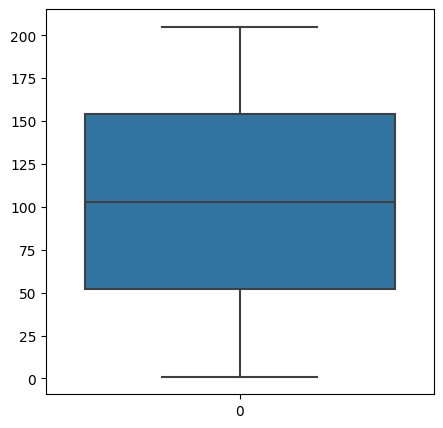

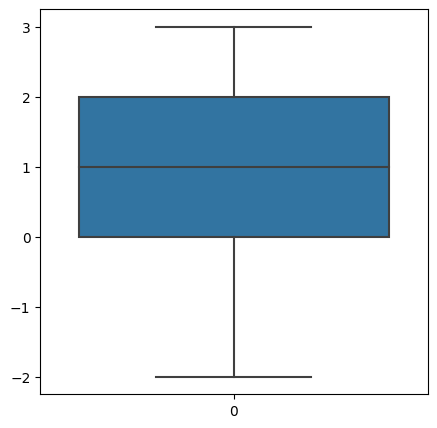

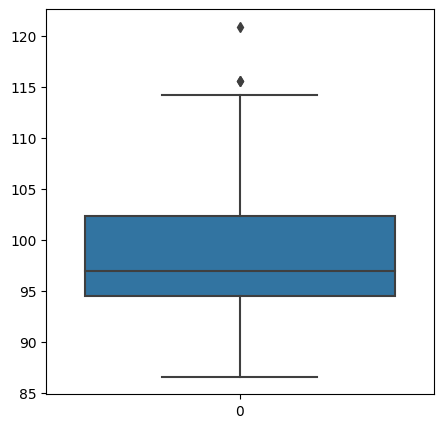

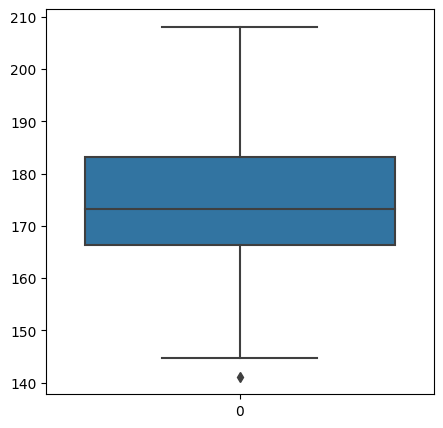

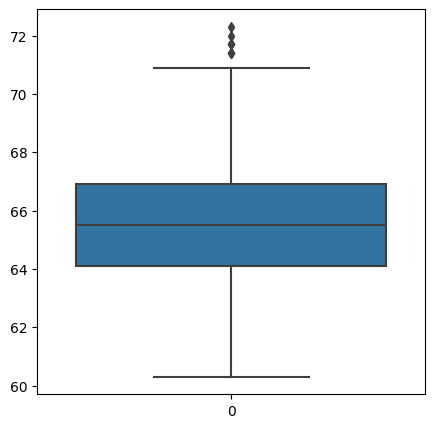

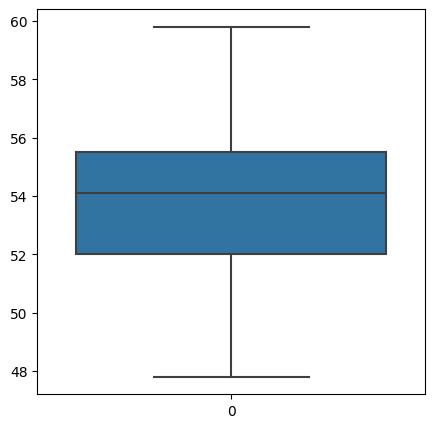

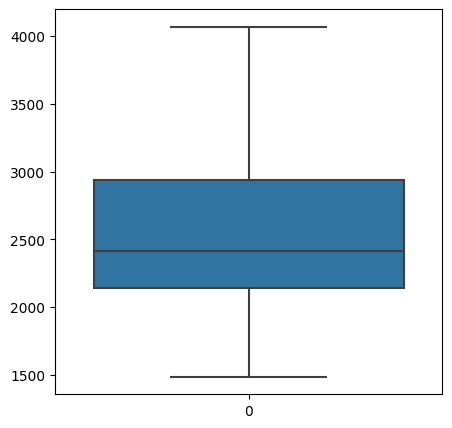

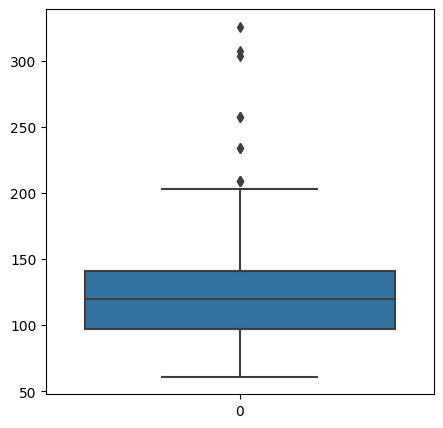

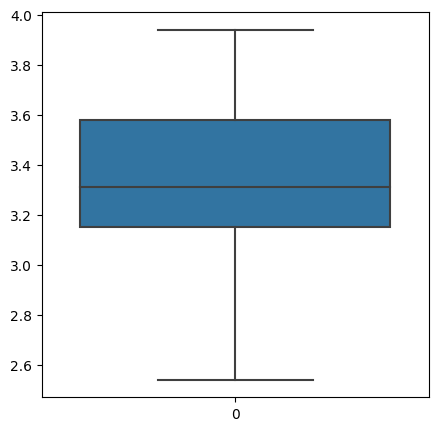

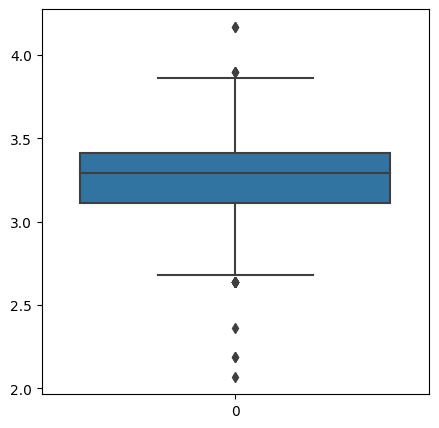

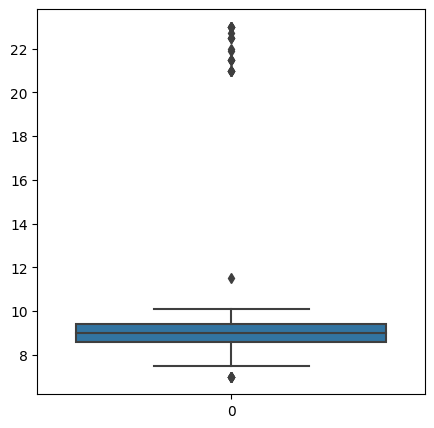

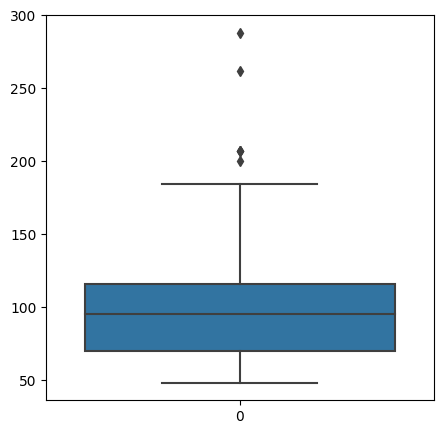

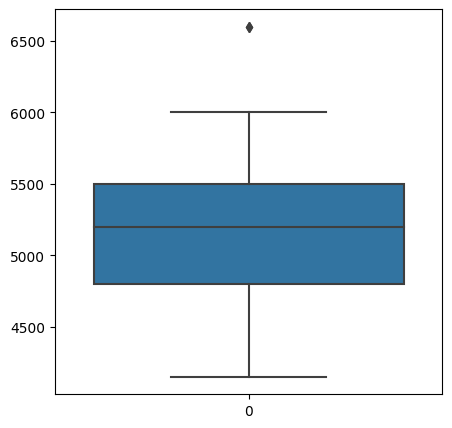

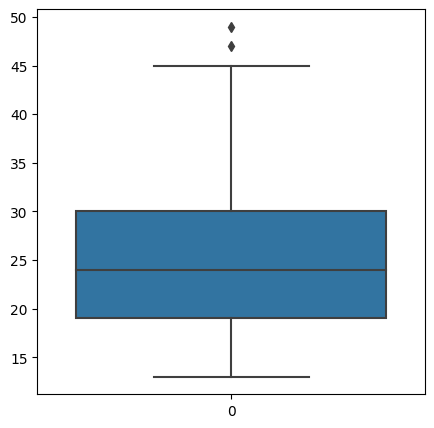

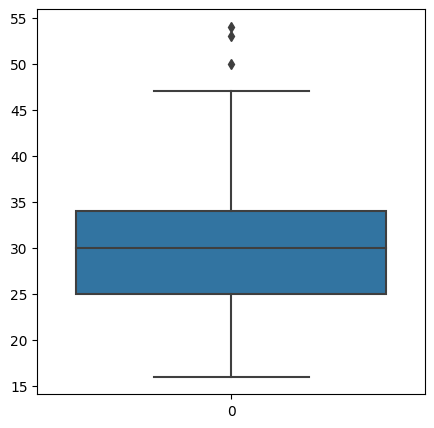

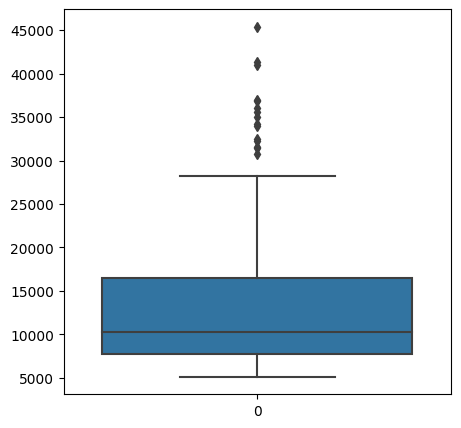

In [5]:
col=list(data.columns)
for i in col:
  if(data[i].dtypes == 'int64' or data[i].dtypes == 'float64'):
    plt.figure(figsize = (5,5))
    sns.boxplot(data[i])
    plt.show()

## Handling Outliers

In [6]:
outliers=["wheelbase","carlength","carwidth","enginesize","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg"]
for i in outliers:
  q1=data[i].quantile(0.25)
  q3=data[i].quantile(0.75)
  IQR=q3-q1
  data.loc[data[i]>= q3 + 1.5 * IQR,i]=q3 + 1.5 * IQR
  data.loc[data[i]<= q1 - 1.5 * IQR,i]=q1 - 1.5 * IQR

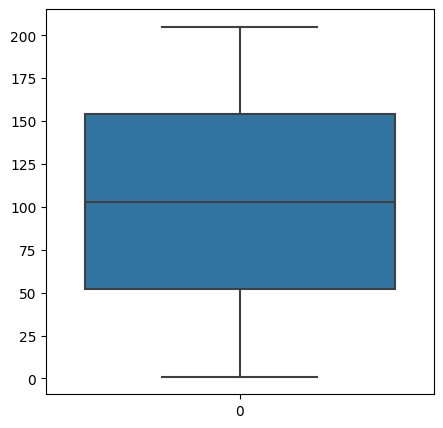

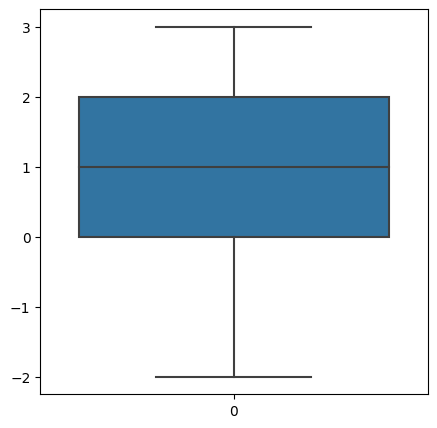

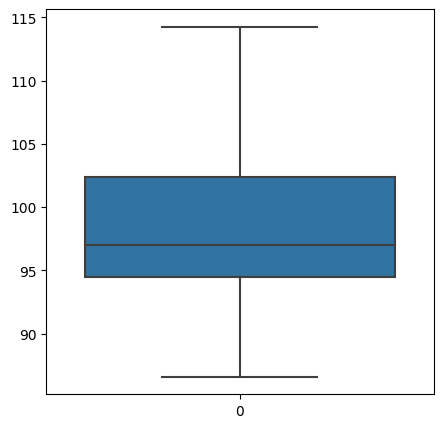

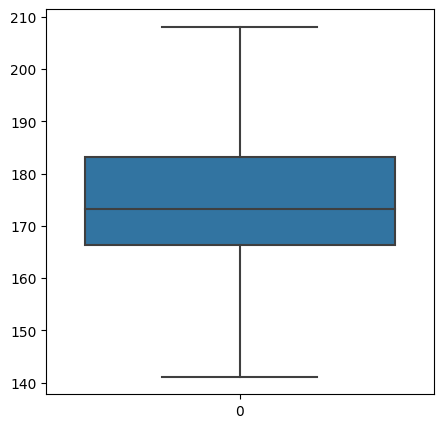

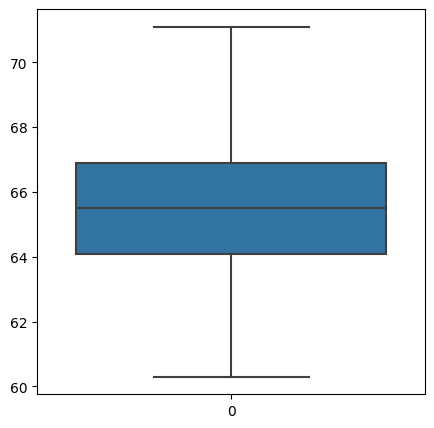

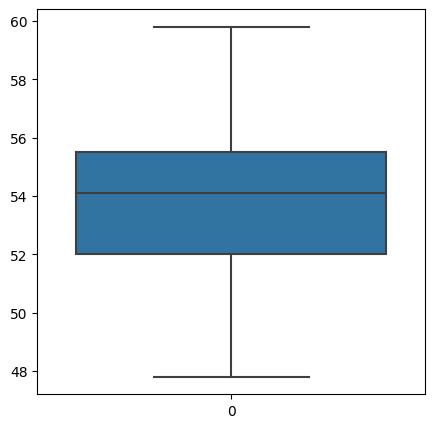

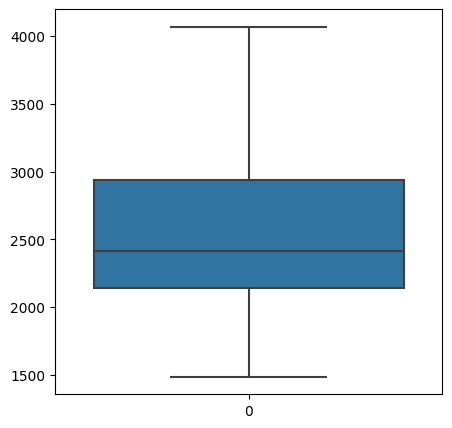

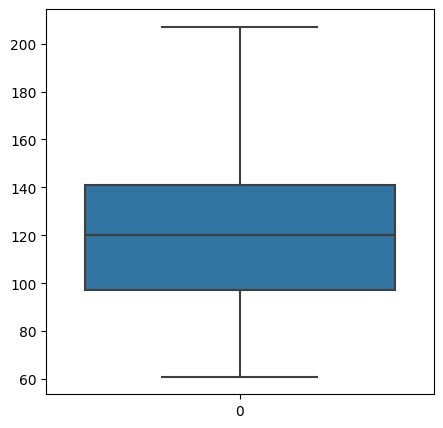

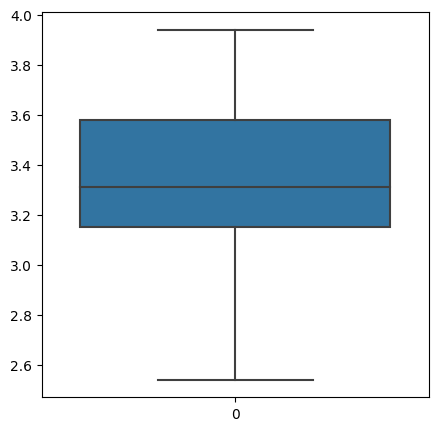

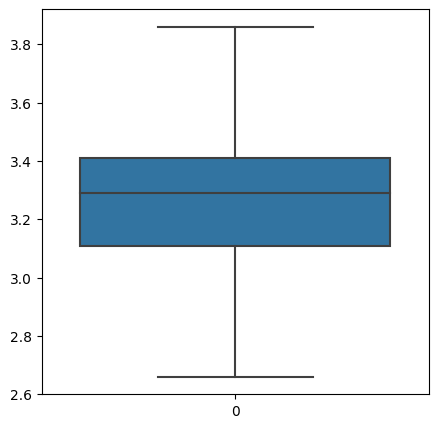

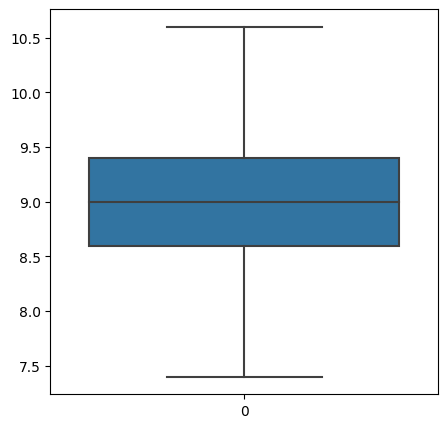

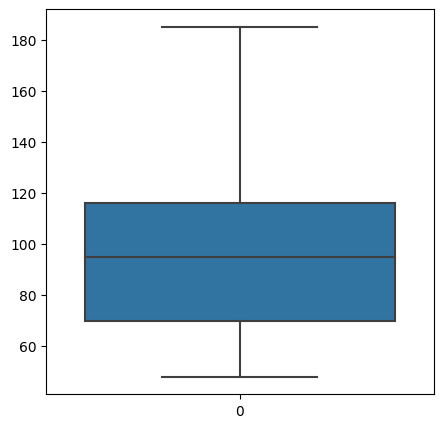

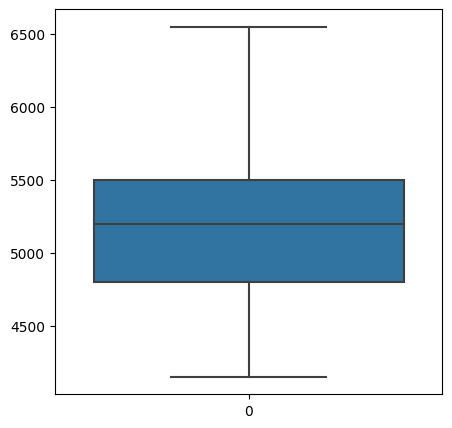

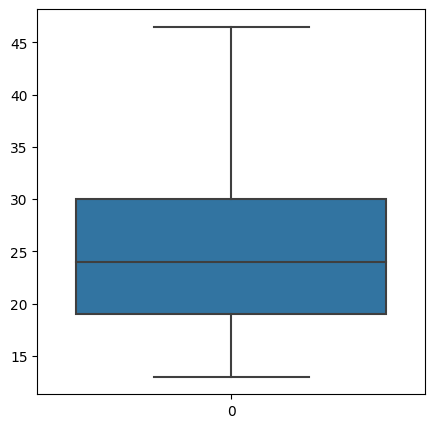

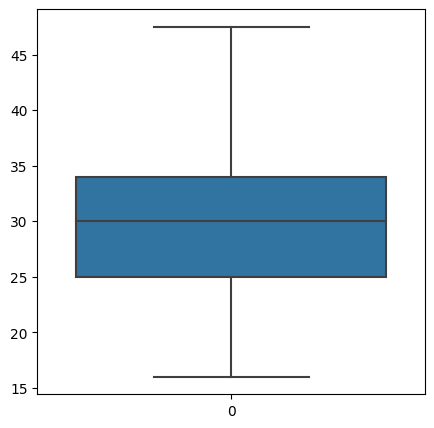

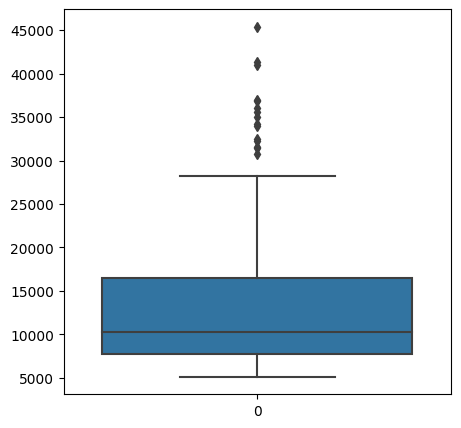

In [7]:
col=list(data.columns)
for i in col:
  if(data[i].dtypes == 'int64' or data[i].dtypes == 'float64'):
    plt.figure(figsize = (5,5))
    sns.boxplot(data[i])
    plt.show()

In [8]:
print(data.shape)

(205, 26)


## Correlation

In [9]:
correlation=data.corr()

In [10]:
correlation['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.854532
curbweight          0.835305
horsepower          0.809985
carwidth            0.753383
carlength           0.682920
wheelbase           0.566761
boreratio           0.553173
carheight           0.119336
stroke              0.063012
symboling          -0.079978
compressionratio   -0.080886
peakrpm            -0.085037
car_ID             -0.109093
citympg            -0.689094
highwaympg         -0.709348
Name: price, dtype: float64

## Multicolinearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
data1 = data.drop(['price',"car_ID"], axis = 1)

In [13]:
col_list = []
for i in data1.columns:
  if((data1[i].dtype!='object') & (i!='charges')):
    col_list.append(i)

X = data1[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,2.651175
1,wheelbase,2395.428860
2,carlength,1884.015878
3,carwidth,2872.170153
4,carheight,897.762064
5,curbweight,370.120195
6,enginesize,121.020630
7,boreratio,306.758735
8,stroke,180.456068
9,compressionratio,257.933289


In [14]:
X = X.drop(['carwidth'], axis = 1)
X.head()

,symboling,wheelbase,carlength,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,48.8,2548,130,3.47,2.68,9.0,111,5000,21.0,27.0
1,3,88.6,168.8,48.8,2548,130,3.47,2.68,9.0,111,5000,21.0,27.0
2,1,94.5,171.2,52.4,2823,152,2.68,3.47,9.0,154,5000,19.0,26.0
3,2,99.8,176.6,54.3,2337,109,3.19,3.40,10.0,102,5500,24.0,30.0
4,2,99.4,176.6,54.3,2824,136,3.19,3.40,8.0,115,5500,18.0,22.0


In [15]:
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,2.256309
1,wheelbase,1981.651824
2,carlength,1808.631120
3,carheight,886.010494
4,curbweight,368.003414
5,enginesize,120.637767
6,boreratio,282.620408
7,stroke,174.974068
8,compressionratio,257.357110
9,horsepower,91.828510


In [16]:
X = X.drop(['wheelbase'], axis = 1)

In [17]:
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,2.071674
1,carlength,1250.010232
2,carheight,807.011736
3,curbweight,339.887271
4,enginesize,118.822613
5,boreratio,274.442617
6,stroke,163.165684
7,compressionratio,256.957778
8,horsepower,91.277793
9,peakrpm,193.730185


In [18]:
X = X.drop(['carlength'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data



,features,VIF
0,symboling,2.056928
1,carheight,518.242891
2,curbweight,250.727418
3,enginesize,117.530976
4,boreratio,252.018178
5,stroke,154.166719
6,compressionratio,254.141771
7,horsepower,91.241459
8,peakrpm,191.623924
9,citympg,304.070364


In [19]:
X = X.drop(['carheight'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,1.929969
1,curbweight,202.985742
2,enginesize,115.735699
3,boreratio,194.972329
4,stroke,148.208697
5,compressionratio,254.096398
6,horsepower,88.288614
7,peakrpm,160.447314
8,citympg,302.620027
9,highwaympg,421.354613


In [20]:
X = X.drop(['highwaympg'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,1.918667
1,curbweight,182.063155
2,enginesize,114.528406
3,boreratio,185.461288
4,stroke,143.831505
5,compressionratio,249.572546
6,horsepower,88.160531
7,peakrpm,156.591645
8,citympg,77.792322


In [21]:
X = X.drop(['compressionratio'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,1.826167
1,curbweight,143.838462
2,enginesize,110.331039
3,boreratio,180.224261
4,stroke,139.748569
5,horsepower,79.842474
6,peakrpm,132.983418
7,citympg,49.499613


In [22]:
X = X.drop(['boreratio'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,1.819192
1,curbweight,111.642071
2,enginesize,109.277751
3,stroke,139.741693
4,horsepower,79.812189
5,peakrpm,114.011194
6,citympg,43.665843


In [23]:
X = X.drop(['stroke'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,1.784372
1,curbweight,99.027430
2,enginesize,105.335912
3,horsepower,78.606826
4,peakrpm,90.988697
5,citympg,36.859896


In [24]:
X = X.drop(['enginesize'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,1.781041
1,curbweight,56.348911
2,horsepower,45.599225
3,peakrpm,69.623664
4,citympg,29.439640


In [25]:
X = X.drop(['peakrpm'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,1.691223
1,curbweight,55.936844
2,horsepower,34.875801
3,citympg,9.128567


In [26]:
X = X.drop(['curbweight'], axis = 1)

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,symboling,1.458107
1,horsepower,3.702580
2,citympg,3.633507


In [27]:
X.head()

,symboling,horsepower,citympg
0,3,111,21.0
1,3,111,21.0
2,1,154,19.0
3,2,102,24.0
4,2,115,18.0


# Splitting Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
y= data["price"]
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42 )

# Scalling the Data

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [33]:
X_train_sc  = pd.DataFrame(X_train_sc)

# Model Building

## LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [35]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [36]:
y_pred=lr.predict(X_test_sc)
y_pred

array([27973.42456586, 24308.97013936, 12430.30742062, 13694.58771814,
       17942.74821777,  6710.64329108,  4216.09912837,  7807.11355446,
       12182.42686613,  2571.38859839, 15602.93796002,  7129.02717776,
       17268.59906297, 12149.65435764, 28558.37456284,  5544.68051901,
         708.98971935, 19776.21935486, 10630.85271586, 12056.51797793,
       10390.85687498, 22850.53236881,  6158.46580258,  2374.6508223 ,
        6544.07718078, 27973.42456586, 14868.43520382, 16317.74433692,
        6710.64329108, 16869.92182542, 17942.74821777,  6544.07718078,
        6600.49356029, 20278.6109838 , 13088.68714819, 17390.57072927,
       15139.95962934, 12699.12827826,  6548.0246725 , 19776.21935486,
        9805.906878  ,  7762.51911046, 13104.4463056 ,  6096.85800751,
        6710.64329108, 10598.08020737,  6544.07718078,  7454.27468474,
       11971.26631184, 19776.21935486,  5995.847184  , 22315.36823138])

In [37]:
print(r2_score(y_test, y_pred))

0.6318490321384369


## KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
model1 = KNeighborsRegressor(n_neighbors=5)

In [40]:
model1.fit(X_train_sc,y_train)

KNeighborsRegressor()

In [41]:
y_pred = model1.predict(X_test_sc)
y_pred

array([34416.1, 22769.6, 11367.8, 13367.8, 19372.8,  6729. ,  7681. ,
        7809.4, 13483. ,  6725.2, 15754. ,  6852. , 17859. , 12497. ,
       37216. ,  6805.6,  7075.4, 17000. ,  8946.2, 12203.8,  9705. ,
       22769.6,  6561.2,  7075.4,  7017. , 34416.1, 11771. , 19341.8,
        6729. , 18044.8, 19372.8,  7017. ,  7809.4, 23969.8,  8819.2,
       16727.8, 14499.8, 14105. ,  8384.5, 17000. ,  9211. ,  7170.4,
       13392. ,  8514.2,  6729. ,  9705. ,  7017. ,  8663.2, 11847.8,
       17000. ,  6161.5, 15796. ])

In [42]:
print(r2_score(y_test, y_pred))

0.7766325160616379


## DecisionTree

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
model2 = DecisionTreeRegressor()

In [45]:
model2.fit(X_train_sc, y_train)

DecisionTreeRegressor()

In [46]:
y_pred = model2.predict(X_test_sc)

In [47]:
y_pred

array([36880.        , 34184.        ,  8949.        , 15040.        ,
       31600.        ,  6729.        , 10795.        ,  8358.        ,
       15467.5       ,  7995.        , 18315.        ,  8058.        ,
       21037.5       , 11073.        , 45400.        ,  6338.        ,
        7995.        , 13816.5       ,  6989.        , 15467.5       ,
       10745.        , 14399.        ,  5118.        ,  7099.        ,
        6908.375     , 36880.        , 11771.        , 16845.        ,
        6729.        , 15985.        , 31600.        ,  6908.375     ,
        8778.        , 31600.        ,  8157.33333333, 21037.5       ,
        9418.        , 12745.        ,  7156.5       , 13816.5       ,
        7775.        ,  7068.        , 16695.        ,  7898.        ,
        6729.        ,  9011.66666667,  6908.375     ,  7603.        ,
       15575.        , 13816.5       ,  8916.5       , 15998.        ])

In [48]:
print(r2_score(y_test, y_pred))

0.754285220133726


## RandomForest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
RF = RandomForestRegressor(n_estimators = 100)

In [51]:
RF.fit(X_train_sc,y_train)

RandomForestRegressor()

In [52]:
y_pred = RF.predict(X_test_sc)

In [53]:
y_pred_df = pd.DataFrame(y_pred)

In [54]:
print(r2_score(y_test, y_pred))

0.8539515979119034


# saving the model

In [55]:
import pickle

In [56]:
pickle.dump(RF, open('carprice_model', 'wb'))